In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
!pip install thop

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 68.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 6.2 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 37.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 27.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 75.7 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.

Train: 549, Validation: 61, Test: 406
Epoch [1/50] | Train Loss: 2.2970, Train Acc: 0.2204 | Val Loss: 2.2262, Val Acc: 0.2623
Epoch [2/50] | Train Loss: 1.9562, Train Acc: 0.5246 | Val Loss: 1.8491, Val Acc: 0.5246
Epoch [3/50] | Train Loss: 1.6283, Train Acc: 0.6721 | Val Loss: 1.5365, Val Acc: 0.5902
Epoch [4/50] | Train Loss: 1.3255, Train Acc: 0.7450 | Val Loss: 1.2819, Val Acc: 0.5902
Epoch [5/50] | Train Loss: 1.0587, Train Acc: 0.7832 | Val Loss: 1.1252, Val Acc: 0.7049
Epoch [6/50] | Train Loss: 0.8488, Train Acc: 0.8470 | Val Loss: 1.0013, Val Acc: 0.7377
Epoch [7/50] | Train Loss: 0.6747, Train Acc: 0.8597 | Val Loss: 0.8782, Val Acc: 0.7377
Epoch [8/50] | Train Loss: 0.5328, Train Acc: 0.8889 | Val Loss: 0.8340, Val Acc: 0.7541
Epoch [9/50] | Train Loss: 0.4191, Train Acc: 0.9417 | Val Loss: 0.7319, Val Acc: 0.7377
Epoch [10/50] | Train Loss: 0.3546, Train Acc: 0.9472 | Val Loss: 0.6713, Val Acc: 0.7377
Epoch [11/50] | Train Loss: 0.2700, Train Acc: 0.9563 | Val Loss: 0.636

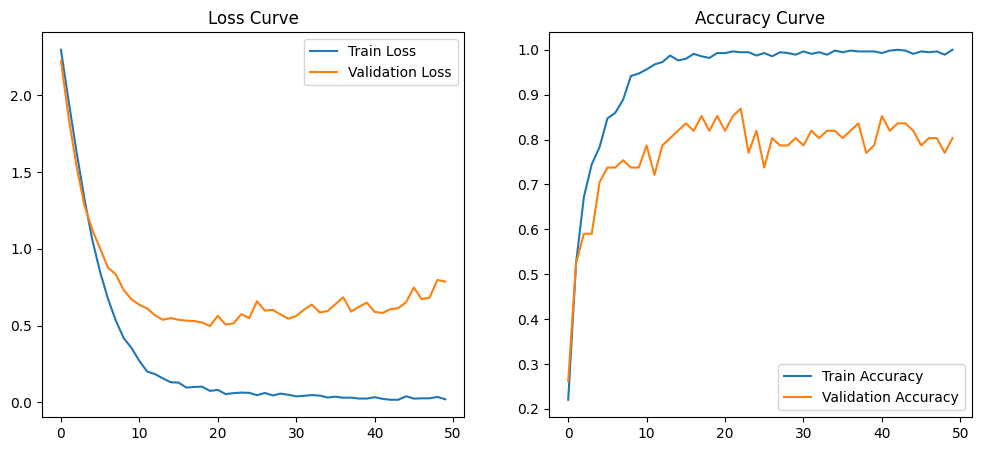


✅ Overall Accuracy: 79.56%

📊 Per-Class Accuracy:
Genus Criconema: 100.00%
Genus Criconemoides: 91.43%
Genus Helicotylenchus: 89.09%
Genus Hemicycliophora: 50.00%
Genus Hirschmaniella: 75.47%
Genus Hoplolaimus: 80.88%
Genus Meloidogyne: 79.07%
Genus Pratylenchus: 64.44%
Genus Radopholus: 43.75%
Genus Trichodorus: 90.91%
Genus Xiphinema: 91.18%

Classification Report:
                       precision    recall  f1-score   support

      Genus Criconema       1.00      1.00      1.00         1
  Genus Criconemoides       0.89      0.91      0.90        35
Genus Helicotylenchus       0.92      0.89      0.91        55
Genus Hemicycliophora       1.00      0.50      0.67         2
 Genus Hirschmaniella       0.73      0.75      0.74        53
    Genus Hoplolaimus       0.81      0.81      0.81        68
    Genus Meloidogyne       0.88      0.79      0.83        86
   Genus Pratylenchus       0.64      0.64      0.64        45
     Genus Radopholus       1.00      0.44      0.61        1

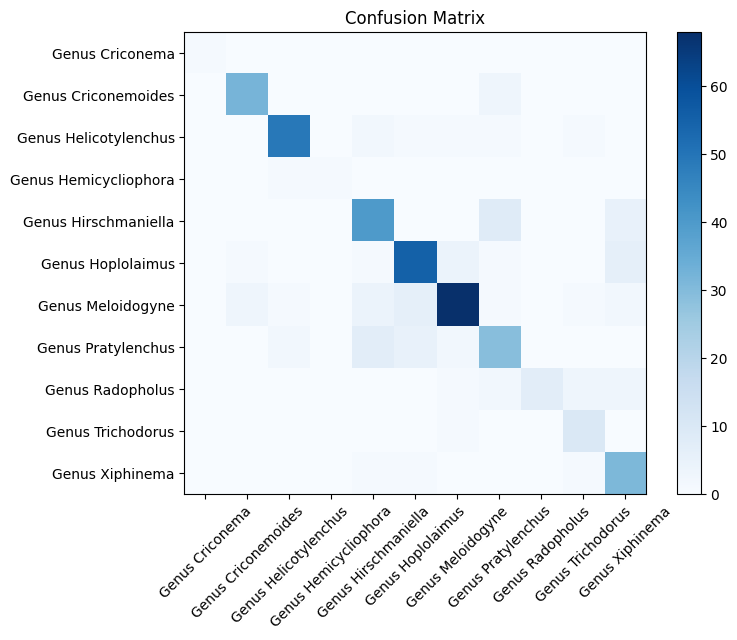

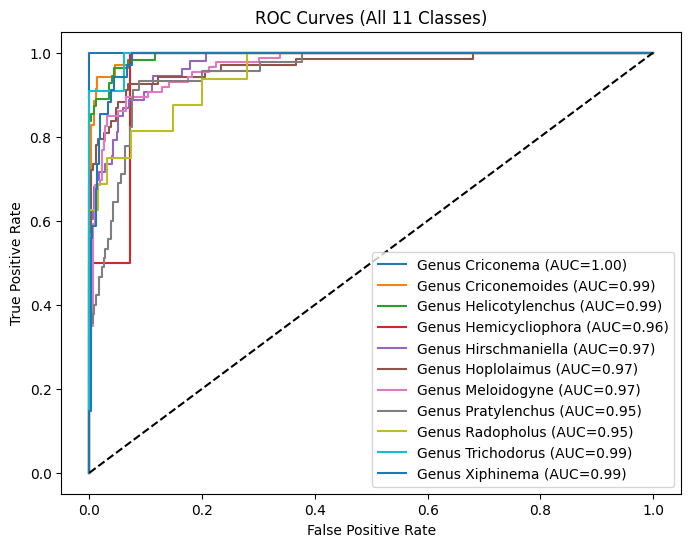

GFLOPs per inference at 224x224: 0.41 GFLOPs


In [4]:
# =============================
# 1️⃣ Imports
# =============================
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms, models
import torch.nn.functional as F
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.utils.multiclass import unique_labels
import numpy as np
import time
from thop import profile
import warnings

warnings.filterwarnings("ignore", category=UserWarning)

# =============================
# 2️⃣ Dataset & Transforms
# =============================
DATA_DIR = "/kaggle/input/plant-parasitic-nematodes-6040/Microscopic Image Dataset of Plant-Parasitic Nematodes"

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

dataset = datasets.ImageFolder(DATA_DIR, transform=transform)
num_classes = len(dataset.classes)

# =============================
# 3️⃣ Train/Test/Validation split (60:40) 
# =============================
test_ratio = 0.4
test_size = int(test_ratio * len(dataset))
train_size = len(dataset) - test_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# Validation = 10% of train
val_ratio = 0.1
val_size = int(val_ratio * len(train_dataset))
train_size_final = len(train_dataset) - val_size
train_dataset, val_dataset = random_split(train_dataset, [train_size_final, val_size])

print(f"Train: {len(train_dataset)}, Validation: {len(val_dataset)}, Test: {len(test_dataset)}")

# DataLoaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# =============================
# 4️⃣ Model (Pretrained EfficientNet-B0)
# =============================
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = models.efficientnet_b0(weights=models.EfficientNet_B0_Weights.DEFAULT)
num_features = model.classifier[1].in_features
model.classifier[1] = nn.Linear(num_features, num_classes)
model = model.to(device)

# Loss & Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

# =============================
# 5️⃣ Training Loop
# =============================
num_epochs = 50
train_losses, val_losses = [], []
train_accs, val_accs = [], []

start_time = time.time()

for epoch in range(num_epochs):
    model.train()
    running_loss, correct, total = 0, 0, 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() * images.size(0)
        _, predicted = outputs.max(1)
        correct += predicted.eq(labels).sum().item()
        total += labels.size(0)
    
    train_loss = running_loss / total
    train_acc = correct / total
    train_losses.append(train_loss)
    train_accs.append(train_acc)
    
    # Validation
    model.eval()
    val_loss, correct, total = 0, 0, 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * images.size(0)
            _, predicted = outputs.max(1)
            correct += predicted.eq(labels).sum().item()
            total += labels.size(0)
    val_loss /= total
    val_acc = correct / total
    val_losses.append(val_loss)
    val_accs.append(val_acc)
    
    print(f"Epoch [{epoch+1}/{num_epochs}] | "
          f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f} | "
          f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")

end_time = time.time()
print(f"Training wall-clock time: {(end_time-start_time)/60:.2f} mins")

# =============================
# 6️⃣ Loss & Accuracy Curves
# =============================
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.legend()
plt.title('Loss Curve')

plt.subplot(1,2,2)
plt.plot(train_accs, label='Train Accuracy')
plt.plot(val_accs, label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Curve')
plt.show()

# =============================
# 7️⃣ Test Evaluation
# =============================
model.eval()
all_labels, all_preds, all_probs = [], [], []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        probs = F.softmax(outputs, dim=1)
        _, predicted = outputs.max(1)
        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(predicted.cpu().numpy())
        all_probs.extend(probs.cpu().numpy())

# Overall Accuracy
overall_acc = accuracy_score(all_labels, all_preds)
print(f"\n✅ Overall Accuracy: {overall_acc*100:.2f}%")

# Per-Class Accuracy
cm = confusion_matrix(all_labels, all_preds)
per_class_acc = cm.diagonal() / cm.sum(axis=1)
print("\n📊 Per-Class Accuracy:")
for i, acc in enumerate(per_class_acc):
    print(f"{dataset.classes[i]}: {acc*100:.2f}%")

# Classification Report (handles missing classes)
labels_present = unique_labels(all_labels, all_preds)
print("\nClassification Report:")
print(classification_report(
    all_labels,
    all_preds,
    labels=labels_present,
    target_names=[dataset.classes[i] for i in labels_present]
))

# Confusion Matrix Plot
plt.figure(figsize=(8,6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks(range(num_classes), dataset.classes, rotation=45)
plt.yticks(range(num_classes), dataset.classes)
plt.show()

# =============================
# 8️⃣ ROC Curves (All 11 classes)
# =============================
labels_bin = label_binarize(all_labels, classes=range(num_classes))
all_probs = np.array(all_probs)

# Pad missing classes if any
if labels_bin.shape[1] < num_classes:
    pad_cols = num_classes - labels_bin.shape[1]
    labels_bin = np.hstack((labels_bin, np.zeros((labels_bin.shape[0], pad_cols))))
    all_probs = np.hstack((all_probs, np.zeros((all_probs.shape[0], pad_cols))))

fpr, tpr, roc_auc = {}, {}, {}
plt.figure(figsize=(8,6))

for i in range(num_classes):
    y_true_class = labels_bin[:, i]
    y_score_class = all_probs[:, i]

    # Ensure at least one positive & negative for ROC
    if len(np.unique(y_true_class)) < 2:
        y_true_class = np.append(y_true_class, [0, 1])
        y_score_class = np.append(y_score_class, [0, 1])

    fpr[i], tpr[i], _ = roc_curve(y_true_class, y_score_class)
    roc_auc[i] = roc_auc_score(y_true_class, y_score_class)
    plt.plot(fpr[i], tpr[i], label=f'{dataset.classes[i]} (AUC={roc_auc[i]:.2f})')

plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves (All 11 Classes)')
plt.legend()
plt.show()

# =============================
# 9️⃣ GFLOPs per inference
# =============================
dummy_input = torch.randn(1, 3, 224, 224).to(device)
macs, params = profile(model, inputs=(dummy_input,), verbose=False)
gflops = macs / 1e9
print(f"GFLOPs per inference at 224x224: {gflops:.2f} GFLOPs")